In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal

## Cross Validation vs. Akaike Information Criterion vs. Bayesian Information Criterion

### Experiment 1: Different Covariance Matrices

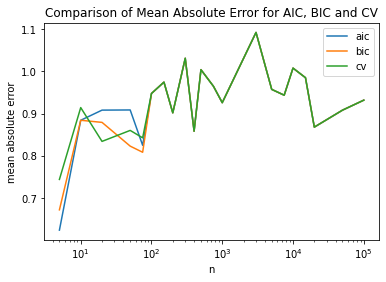

In [9]:
# sample sizes
n_samples = [5, 10, 20, 50, 75, 100, 150, 200, 300, 400, 500, 750, 1000, 3000, 5000, 7500, 10000, 15000, 20000, 50000, 100000] 
# features and components
d = 6
k = 3
# number of iterations per experiment
T = 50

# means (3 components and 6 features)
mu = np.array([
    np.zeros(6), 
    np.ones(6),
    [2, 2, 2, 2, 2, 2]])

# covariance matrices (3 components and 6 features)
cov_matrices = np.array([
    make_spd_matrix(d),
    make_spd_matrix(d),
    make_spd_matrix(d)])

# mixing coefficients (every component is equally likely)
pi = np.array([1/3, 1/3, 1/3])

# different covariance matrix types (given by sklearn GMM)
cov_types = ['full', 'tied', 'diag', 'spherical']
    
aic_mean_mean_abs_errors = []
bic_mean_mean_abs_errors = []
cv_mean_mean_abs_errors = []
for n in n_samples:
    # generate n points from GMM 
    X = np.zeros((n, d))
    components = np.random.choice(len(pi), size=n, p=pi)
   
    for i, c in enumerate(components):
        X[i,:] = multivariate_normal.rvs(mean=mu[c], cov=cov_matrices[c])
        
    
    aic_mean_abs_errors = []
    bic_mean_abs_errors = []
    cv_mean_abs_errors = []
    # true distribution stays the same for every iteration T
    # repeat experiment 50 times and calculate mean of all mean absolute errors
    for t in range(T):
        #values_aic = []
        #values_bic = []
        #values_cv = []
        best_aic = np.infty
        best_bic = np.infty
        best_cv = -np.infty
        # find best model over different covariance matrices
        for c in cov_types:
            # fit gaussian mixture model
            gmm = GaussianMixture(n_components=k, covariance_type=c).fit(X)

            # calculate aic and select best model
            aic = gmm.aic(X)
            if aic < best_aic:
                best_aic = aic
                best_gmm_aic = gmm
            #values_aic.append(aic)

            # calculate bic
            bic = gmm.bic(X)
            if bic < best_bic:
                best_bic = bic
                best_gmm_bic = gmm
            #values_bic.append(bic)

            # calculate cv score (with default 5-fold cv)
            cvs = cross_val_score(gmm, X, components)
            cv = max(cvs)
            if cv > best_cv:
                best_cv = cv
                best_gmm_cv = gmm
            #values_cv.append(cv)
        
        #print("n=", n)    
        #print(values_aic)
        #print(values_bic)
        #print(values_cv)

        # calculate mean absolute error for the best models given by aic, bic and cv for every t
        comp_pred = best_gmm_aic.predict(X)
        mae = mean_absolute_error(components, comp_pred)
        aic_mean_abs_errors.append(mae)

        comp_pred = best_gmm_bic.predict(X)
        mae = mean_absolute_error(components, comp_pred)
        bic_mean_abs_errors.append(mae)

        comp_pred = best_gmm_cv.predict(X)
        mae = mean_absolute_error(components, comp_pred)
        cv_mean_abs_errors.append(mae)
        
    # calculate mean of the T mean absolute errors
    aic_mean_mean_abs_errors.append(np.mean(aic_mean_abs_errors))
    bic_mean_mean_abs_errors.append(np.mean(bic_mean_abs_errors))
    cv_mean_mean_abs_errors.append(np.mean(cv_mean_abs_errors))
    
#print(aic_mean_abs_errors)    
#print(bic_mean_abs_errors)    
#print(cv_mean_abs_errors)    
    
# plot mean absolute errors of cv, aic and bic as a function of sample size n
plt.plot(n_samples, aic_mean_mean_abs_errors, label="aic")
plt.plot(n_samples, bic_mean_mean_abs_errors, label="bic")
plt.plot(n_samples, cv_mean_mean_abs_errors, label="cv")
plt.semilogx()
plt.title("Comparison of Mean Absolute Error for AIC, BIC and CV")
plt.xlabel("n")
plt.ylabel("mean absolute error")
plt.legend()
plt.show()

### Experiment 2: Different Numbers of Components

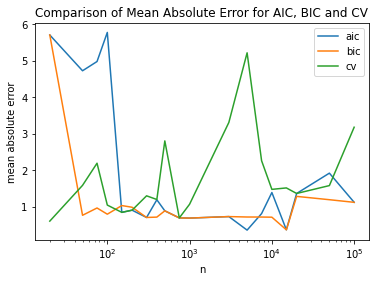

In [20]:
# sample size 
n_samples = [20, 50, 75, 100, 150, 200, 300, 400, 500, 750, 1000, 3000, 5000, 7500, 10000, 15000, 20000, 50000, 100000] 
d = 2
k = 3

# means (3 components and 2 features)
mu = np.array([
    [0, 0], 
    [1, 0],
    [0, 2]])

# covariance matrices (3 components and 2 features)
cov_matrices = np.array([
    make_spd_matrix(d),
    make_spd_matrix(d),
    make_spd_matrix(d)])

# mixing coefficients (every component is equally likely)
pi = np.array([1/3, 1/3, 1/3])

# different numbers of components (k=1-15)
comps = np.arange(1, 16)

aic_mean_abs_errors = []
bic_mean_abs_errors = []
cv_mean_abs_errors = []
for n in n_samples:
    # generate n samples from GMM
    X = np.zeros((n, d))
    components = np.random.choice(len(pi), size=n, p=pi)
    
    for i, c in enumerate(components):
        X[i,:] = multivariate_normal.rvs(mean=mu[c], cov=cov_matrices[c])

    values_aic = []
    values_bic = []
    values_cv = []
    best_aic = np.infty
    best_bic = np.infty
    best_cv = -np.infty
    # find best model over different numbers of components
    for k in comps:
        # fit gaussian mixture model
        gmm = GaussianMixture(n_components=k, covariance_type='full').fit(X)

        # calculate aic and select best model
        aic = gmm.aic(X)
        if aic < best_aic:
            best_aic = aic
            best_gmm_aic = gmm
        values_aic.append(aic)
        
        # calculate bic
        bic = gmm.bic(X)
        if bic < best_bic:
            best_bic = bic
            best_gmm_bic = gmm
        values_bic.append(bic)
        
        # calculate cv score (with default 5-fold cv)
        cvs = cross_val_score(gmm, X, components)
        cv = max(cvs)
        if cv > best_cv:
            best_cv = cv
            best_gmm_cv = gmm
        values_cv.append(cv)
        
    #print("n=", n)    
    #print(values_aic)
    #print(values_bic)
    #print(values_cv)
        
    # calculate mean absolute error for the best models given by aic, bic and cv
    comp_pred = best_gmm_aic.predict(X)
    mae = mean_absolute_error(components, comp_pred)
    aic_mean_abs_errors.append(mae)
    
    comp_pred = best_gmm_bic.predict(X)
    mae = mean_absolute_error(components, comp_pred)
    bic_mean_abs_errors.append(mae)
    
    comp_pred = best_gmm_cv.predict(X)
    mae = mean_absolute_error(components, comp_pred)
    cv_mean_abs_errors.append(mae)

#print(aic_mean_abs_errors)    
#print(bic_mean_abs_errors)    
#print(cv_mean_abs_errors) 
    
# plot mean absolute errors of cv, aic and bic as a function of sample size n
plt.plot(n_samples, aic_mean_abs_errors, label="aic")
plt.plot(n_samples, bic_mean_abs_errors, label="bic")
plt.plot(n_samples, cv_mean_abs_errors, label="cv")
plt.semilogx()
plt.title("Comparison of Mean Absolute Error for AIC, BIC and CV")
plt.xlabel("n")
plt.ylabel("mean absolute error")
plt.legend()
plt.show()


### Experiment 3: Real World Data

In [6]:
# import seeds dataset, shuffle data
data = np.loadtxt('seeds_dataset.txt')
np.random.shuffle(data)
X = data[:, :-1]
y = data[:, -1]

# find a good model
comps = np.arange(1,11)
cov_types = ['full', 'tied', 'diag', 'spherical']
values_aic = []
values_bic = []
values_cv = []
best_aic = np.infty
best_bic = np.infty
best_cv = -np.infty
# find best model over different covariance types and numbers of components
for c in cov_types:
    for k in comps:
        # fit gaussian mixture model
        gmm = GaussianMixture(n_components=k, covariance_type=c).fit(X)

        # calculate aic and find best model
        aic = gmm.aic(X)
        if aic < best_aic:
            best_aic = aic
            best_gmm_aic = gmm
        values_aic.append(aic)

        # calculate bic
        bic = gmm.bic(X)
        if bic < best_bic:
            best_bic = bic
            best_gmm_bic = gmm
        values_bic.append(bic)

        # calculate cv score (with default 5-fold cv)
        cvs = cross_val_score(gmm, X, y)
        cv = max(cvs)
        if cv > best_cv:
            best_cv = cv
            best_gmm_cv = gmm
        values_cv.append(cv)
        
# calculate mean absolute error for the best models of aic, bic and cv
mae = []
y_pred_aic = best_gmm_aic.predict(X)
mae.append(mean_absolute_error(y, y_pred_aic))

y_pred_bic = best_gmm_bic.predict(X)
mae.append(mean_absolute_error(y, y_pred_bic))

y_pred_cv = best_gmm_cv.predict(X)
mae.append(mean_absolute_error(y, y_pred_cv))

# choose model with the lowest mean absolute error and report its index
min_idx = np.argmin(mae)

# report number of components, number of points per component and responsibility values
if min_idx == 0:
    print("Best Model found by AIC")
    print(best_gmm_aic.covariance_type)
    print(best_gmm_aic.n_components)
    components, counts = np.unique(y_pred_aic, return_counts=True)
    print(dict(zip(components, counts)))
    responsibilities = counts/y_pred_aic.shape[0]
    print(responsibilities)
elif min_idx == 1:
    print("Best Model found by BIC")
    print(best_gmm_bic.covariance_type)
    print(best_gmm_bic.n_components)
    components, counts = np.unique(y_pred_bic, return_counts=True)
    print(dict(zip(components, counts)))
    responsibilities = counts/y_pred_bic.shape[0]
    print(responsibilities)
elif min_idx == 2:
    print("Best Model found by CV")
    print(best_gmm_cv.covariance_type)
    print(best_gmm_cv.n_components)
    components, counts = np.unique(y_pred_cv, return_counts=True)
    print(dict(zip(components, counts)))
    responsibilities = counts/y_pred_cv.shape[0]
    print(responsibilities)


Best Model found by BIC
full
3
{0: 87, 1: 67, 2: 56}
[0.41428571 0.31904762 0.26666667]


### Experiment 1 (with augmented samples)

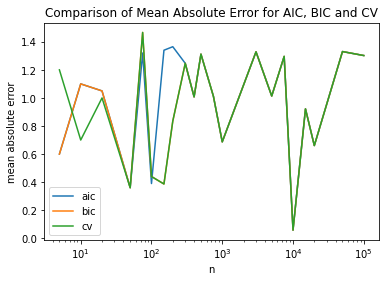

In [5]:
# augment the previous samples instead of sampling a whole new dataset

# sample sizes
n_samples = [5, 10, 20, 50, 75, 100, 150, 200, 300, 400, 500, 750, 1000, 3000, 5000, 7500, 10000, 15000, 20000, 50000, 100000] 
# features and components
d = 6
k = 3

# means (3 components and 6 features)
mu = np.array([
    np.zeros(6), 
    np.ones(6),
    [2, 2, 2, 2, 2, 2]])

# covariance matrices (3 components and 6 features)
cov_matrices = np.array([
    make_spd_matrix(d),
    make_spd_matrix(d),
    make_spd_matrix(d)])

# mixing coefficients (every component is equally likely)
pi = np.array([1/3, 1/3, 1/3])

# different covariance matrix types (given by sklearn GMM)
cov_types = ['full', 'tied', 'diag', 'spherical']
    
# calculate cv scores and aic for different covariance matrices and calculate mean absolute errors for best models  
aic_mean_abs_errors = []
bic_mean_abs_errors = []
cv_mean_abs_errors = []

# initial sample (size=5)
X = np.zeros((n_samples[0], d))
components = np.random.choice(len(pi), size=n_samples[0], p=pi)

for i, c in enumerate(components):
    X[i,:] = multivariate_normal.rvs(mean=mu[c], cov=cov_matrices[c])
    

for n in n_samples:
    
    # augment samples (ignore for first sample size)
    if n != n_samples[0]: 
        n_new_samples = n-n_previous
        X_new = np.zeros((n_new_samples, d))
        components_new = np.random.choice(len(pi), size=n_new_samples, p=pi)

        for i, c in enumerate(components_new):
            X_new[i,:] = multivariate_normal.rvs(mean=mu[c], cov=cov_matrices[c])
            
        X = np.concatenate((X, X_new), axis=0)
        components = np.concatenate((components, components_new), axis=0)
    
    n_previous = n
    values_aic = []
    values_bic = []
    values_cv = []
    best_aic = np.infty
    best_bic = np.infty
    best_cv = -np.infty
    for c in cov_types:
        # fit gaussian mixture model
        gmm = GaussianMixture(n_components=k, covariance_type=c).fit(X)

        # calculate aic and select best model
        aic = gmm.aic(X)
        if aic < best_aic:
            best_aic = aic
            best_gmm_aic = gmm
        values_aic.append(aic)
        
        # calculate bic
        bic = gmm.bic(X)
        if bic < best_bic:
            best_bic = bic
            best_gmm_bic = gmm
        values_bic.append(bic)
        
        # calculate cv score (with default 5-fold cv)
        cvs = cross_val_score(gmm, X, components)
        cv = max(cvs)
        if cv > best_cv:
            best_cv = cv
            best_gmm_cv = gmm
        values_cv.append(cv)
        
    #print("n=", n)    
    #print(values_aic)
    #print(values_bic)
    #print(values_cv)
        
    # calculate mean absolute error for the best models given by aic, bic and cv
    comp_pred = best_gmm_aic.predict(X)
    mae = mean_absolute_error(components, comp_pred)
    aic_mean_abs_errors.append(mae)
    
    comp_pred = best_gmm_bic.predict(X)
    mae = mean_absolute_error(components, comp_pred)
    bic_mean_abs_errors.append(mae)
    
    comp_pred = best_gmm_cv.predict(X)
    mae = mean_absolute_error(components, comp_pred)
    cv_mean_abs_errors.append(mae)
    
#print(aic_mean_abs_errors)    
#print(bic_mean_abs_errors)    
#print(cv_mean_abs_errors)    
    
# plot mean absolute errors of cv and aic as a function of sample size n
plt.plot(n_samples, aic_mean_abs_errors, label="aic")
plt.plot(n_samples, bic_mean_abs_errors, label="bic")
plt.plot(n_samples, cv_mean_abs_errors, label="cv")
plt.semilogx()
plt.title("Comparison of Mean Absolute Error for AIC, BIC and CV")
plt.xlabel("n")
plt.ylabel("mean absolute error")
plt.legend()
plt.show()

### Experiment 1 mit erweiterten Daten und Mean Mean Absolute Error

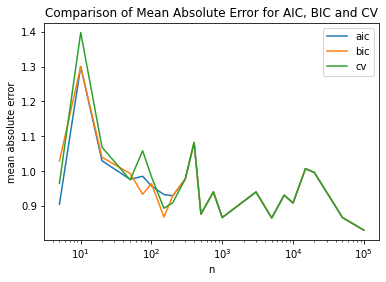

In [11]:
# sample sizes
n_samples = [5, 10, 20, 50, 75, 100, 150, 200, 300, 400, 500, 750, 1000, 3000, 5000, 7500, 10000, 15000, 20000, 50000, 100000] 
# features and components
d = 6
k = 3
# number of iterations per experiment
T = 50

# means (3 components and 6 features)
mu = np.array([
    np.zeros(6), 
    np.ones(6),
    [2, 2, 2, 2, 2, 2]])

# covariance matrices (3 components and 6 features)
cov_matrices = np.array([
    make_spd_matrix(d),
    make_spd_matrix(d),
    make_spd_matrix(d)])

# mixing coefficients (every component is equally likely)
pi = np.array([1/3, 1/3, 1/3])

# different covariance matrix types (given by sklearn GMM)
cov_types = ['full', 'tied', 'diag', 'spherical']

# initial sample (size=5)
X = np.zeros((n_samples[0], d))
components = np.random.choice(len(pi), size=n_samples[0], p=pi)

for i, c in enumerate(components):
    X[i,:] = multivariate_normal.rvs(mean=mu[c], cov=cov_matrices[c])
    
    
aic_mean_mean_abs_errors = []
bic_mean_mean_abs_errors = []
cv_mean_mean_abs_errors = []
for n in n_samples:
    
    # augment samples (ignore for first sample size)
    if n != n_samples[0]: 
        n_new_samples = n-n_previous
        X_new = np.zeros((n_new_samples, d))
        components_new = np.random.choice(len(pi), size=n_new_samples, p=pi)

        for i, c in enumerate(components_new):
            X_new[i,:] = multivariate_normal.rvs(mean=mu[c], cov=cov_matrices[c])
            
        X = np.concatenate((X, X_new), axis=0)
        components = np.concatenate((components, components_new), axis=0)
        
    n_previous = n
    aic_mean_abs_errors = []
    bic_mean_abs_errors = []
    cv_mean_abs_errors = []
    # true distribution stays the same for every iteration T
    # repeat experiment 50 times and calculate mean of all mean absolute errors
    for t in range(T):
        #values_aic = []
        #values_bic = []
        #values_cv = []
        best_aic = np.infty
        best_bic = np.infty
        best_cv = -np.infty
        # find best model over different covariance matrices
        for c in cov_types:
            # fit gaussian mixture model
            gmm = GaussianMixture(n_components=k, covariance_type=c).fit(X)

            # calculate aic and select best model
            aic = gmm.aic(X)
            if aic < best_aic:
                best_aic = aic
                best_gmm_aic = gmm
            #values_aic.append(aic)

            # calculate bic
            bic = gmm.bic(X)
            if bic < best_bic:
                best_bic = bic
                best_gmm_bic = gmm
            #values_bic.append(bic)

            # calculate cv score (with default 5-fold cv)
            cvs = cross_val_score(gmm, X, components)
            cv = max(cvs)
            if cv > best_cv:
                best_cv = cv
                best_gmm_cv = gmm
            #values_cv.append(cv)
        
        #print("n=", n)    
        #print(values_aic)
        #print(values_bic)
        #print(values_cv)

        # calculate mean absolute error for the best models given by aic, bic and cv for every t
        comp_pred = best_gmm_aic.predict(X)
        mae = mean_absolute_error(components, comp_pred)
        aic_mean_abs_errors.append(mae)

        comp_pred = best_gmm_bic.predict(X)
        mae = mean_absolute_error(components, comp_pred)
        bic_mean_abs_errors.append(mae)

        comp_pred = best_gmm_cv.predict(X)
        mae = mean_absolute_error(components, comp_pred)
        cv_mean_abs_errors.append(mae)
        
    # calculate mean of the T mean absolute errors
    aic_mean_mean_abs_errors.append(np.mean(aic_mean_abs_errors))
    bic_mean_mean_abs_errors.append(np.mean(bic_mean_abs_errors))
    cv_mean_mean_abs_errors.append(np.mean(cv_mean_abs_errors))
    
#print(aic_mean_abs_errors)    
#print(bic_mean_abs_errors)    
#print(cv_mean_abs_errors)    
    
# plot mean absolute errors of cv, aic and bic as a function of sample size n
plt.plot(n_samples, aic_mean_mean_abs_errors, label="aic")
plt.plot(n_samples, bic_mean_mean_abs_errors, label="bic")
plt.plot(n_samples, cv_mean_mean_abs_errors, label="cv")
plt.semilogx()
plt.title("Comparison of Mean Absolute Error for AIC, BIC and CV")
plt.xlabel("n")
plt.ylabel("mean absolute error")
plt.legend()
plt.show()